### We read in the data

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np


day_hour_count = pd.read_csv("../data/bikeshare_hour_count.csv")
day_hour_count

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


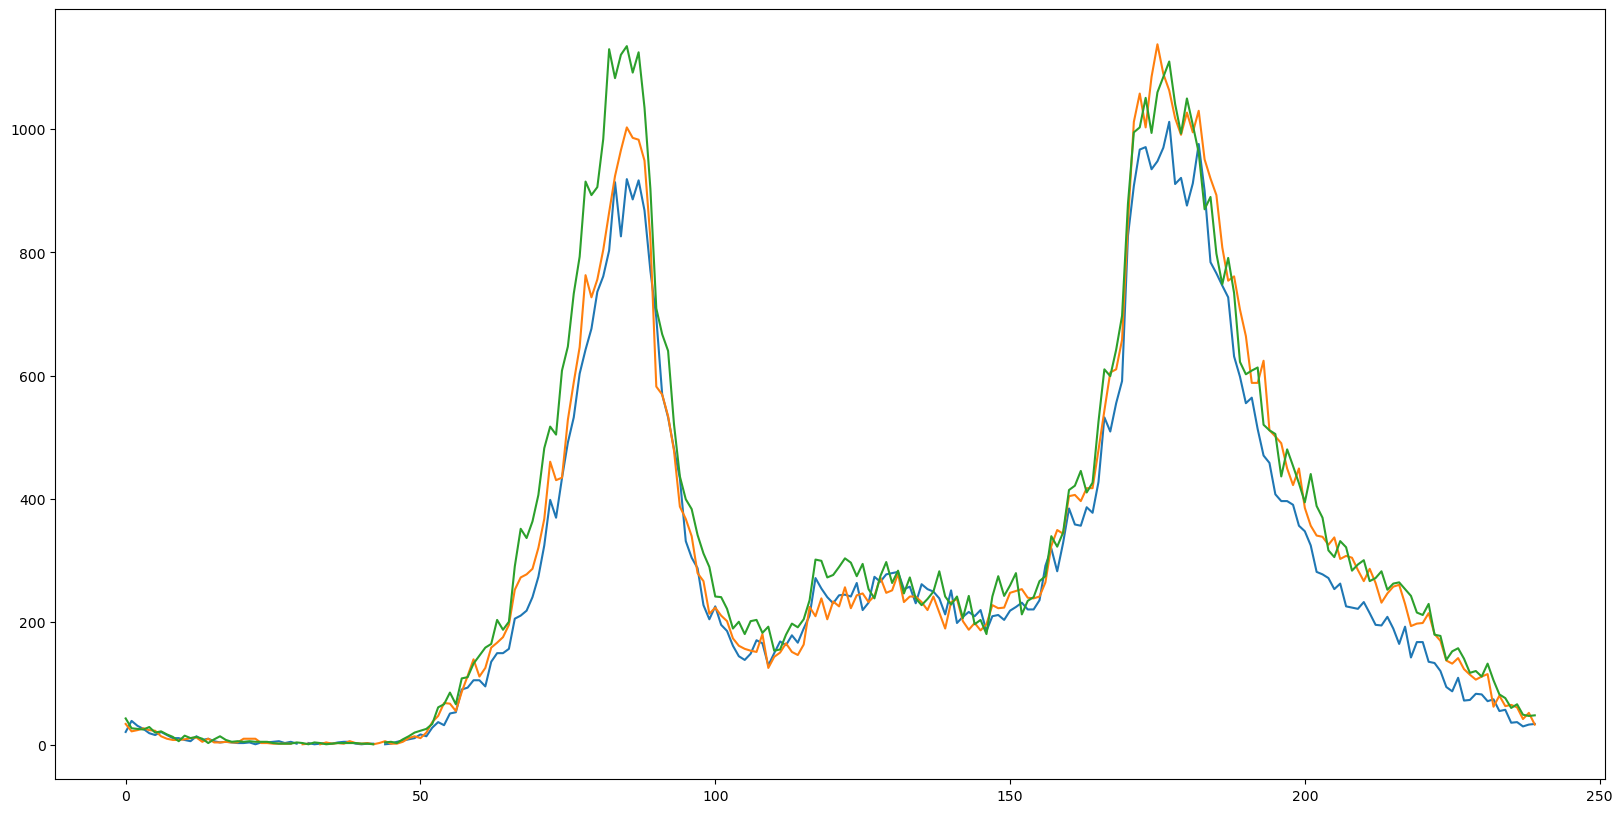

In [3]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["monday"])
plt.plot(day_hour_count.index, day_hour_count["tuesday"])
plt.plot(day_hour_count.index, day_hour_count["wednesday"])

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create 4 dataframes `monday`, `tuesday`, `saturday` and `sunday` that represent the data for those days. (hint: Monday is day=0)

In [4]:
monday = day_hour_count[["hour","monday"]].copy()

In [5]:
monday

,hour,monday
0,0.0,21.0
1,0.1,39.0
2,0.2,31.0
3,0.3,26.0
4,0.4,19.0
...,...,...
235,23.5,36.0
236,23.6,37.0
237,23.7,30.0
238,23.8,33.0


In [6]:
tuesday = day_hour_count[["hour","tuesday"]].copy()
saturday = day_hour_count[["hour","saturday"]].copy()
sunday = day_hour_count[["hour","sunday"]].copy()
tuesday

,hour,tuesday
0,0.0,34.0
1,0.1,22.0
2,0.2,24.0
3,0.3,27.0
4,0.4,24.0
...,...,...
235,23.5,65.0
236,23.6,61.0
237,23.7,42.0
238,23.8,52.0


In [7]:
saturday

,hour,saturday
0,0.0,89.0
1,0.1,87.0
2,0.2,98.0
3,0.3,99.0
4,0.4,98.0
...,...,...
235,23.5,93.0
236,23.6,95.0
237,23.7,105.0
238,23.8,93.0


In [8]:
sunday

,hour,sunday
0,0.0,106.0
1,0.1,100.0
2,0.2,77.0
3,0.3,87.0
4,0.4,69.0
...,...,...
235,23.5,28.0
236,23.6,28.0
237,23.7,27.0
238,23.8,24.0



## 2a. Create 3 models fit to (`x=hour`, `y=monday`)  with varying polynomial degrees ( choose from `n=5,15,20`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

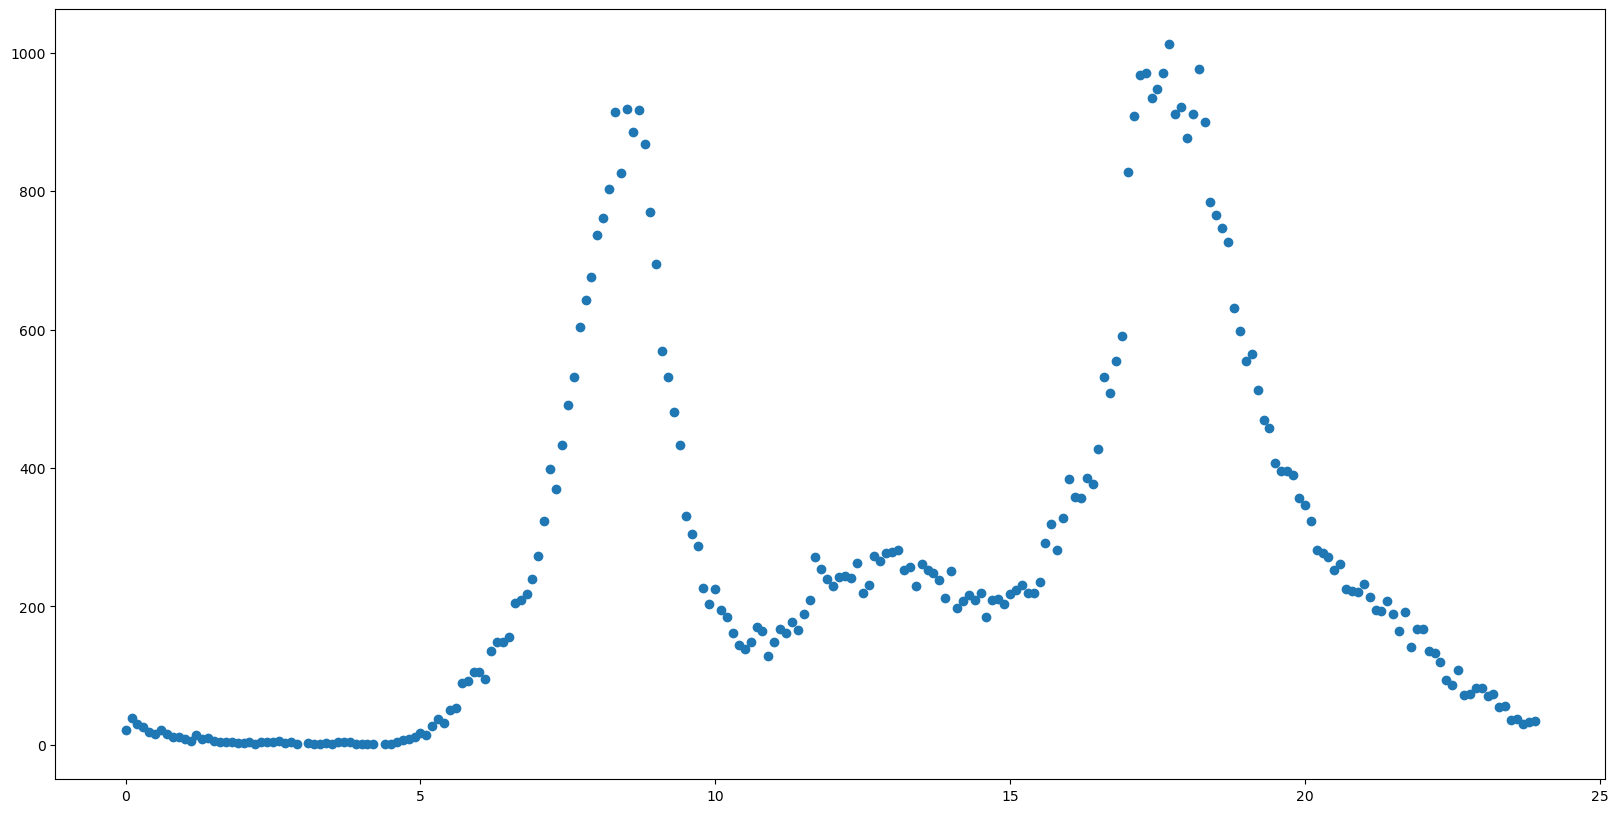

In [9]:
from sklearn import linear_model, metrics
linear = linear_model.LinearRegression()


monday["hour"]
plt.scatter(monday["hour"],monday["monday"])
#plt.scatter(tuesday["hour"],tuesday["tuesday"])
#plt.scatter(saturday["hour"],saturday["saturday"])
#plt.scatter(sunday["hour"],sunday["sunday"])


In [10]:
from sklearn.preprocessing import PolynomialFeatures

x = monday['hour']
y = monday['monday']

x = np.asarray(x)
y = np.asarray(y)

x = x.reshape(-1,1)
y = y.reshape(-1,1)

x = np.nan_to_num(x, nan=0.0) # A NaN is throwing off my models 
y = np.nan_to_num(y, nan=0.0)

# x_2 = PolynomialFeatures(degree=2).fit_transform(x)
# linear2 = linear_model.LinearRegression().fit(x, y)

#plt.plot(x, linear2.predict(x_2), c='r')
# plt.plot(x, linear10.predict(x), c='b')
#plt.plot(x, linear.predict(x), c='g')

In [11]:
# Linear
linear = linear_model.LinearRegression()

# x ^ 10 Polynomial
linear.fit(x,y)

poly = PolynomialFeatures(degree=10)
x_10 = poly.fit_transform(x)

linear10_monday = linear_model.LinearRegression()
linear10_monday.fit(x_10, y)
(linear10_monday.coef_, linear.intercept_)

# x ^ 5 Polynomial
poly = PolynomialFeatures(degree=5)
x_5 = poly.fit_transform(x)

linear5_monday = linear_model.LinearRegression()
linear5_monday.fit(x_5, y)
(linear5_monday.coef_, linear.intercept_)

# x ^ 20 Polynomial
poly = PolynomialFeatures(degree=20)
x_20 = poly.fit_transform(x)

linear20_monday = linear_model.LinearRegression()
linear20_monday.fit(x_20, y)
(linear20_monday.coef_, linear.intercept_)

(array([[ 0.00000000e+00, -1.52574318e-14, -1.56457436e-17,
         -1.73129619e-20, -6.49100390e-21, -7.15213475e-20,
         -7.81743124e-19, -8.17612543e-18, -8.10885705e-17,
         -7.51863960e-16, -6.38010372e-15, -4.79313269e-14,
         -3.01428617e-13, -1.42200732e-12, -3.75451987e-12,
          9.95507740e-13, -1.00397587e-13,  4.96809904e-15,
         -1.21550106e-16,  1.18259680e-18, -8.91647308e-23]]),
 array([114.23817427]))

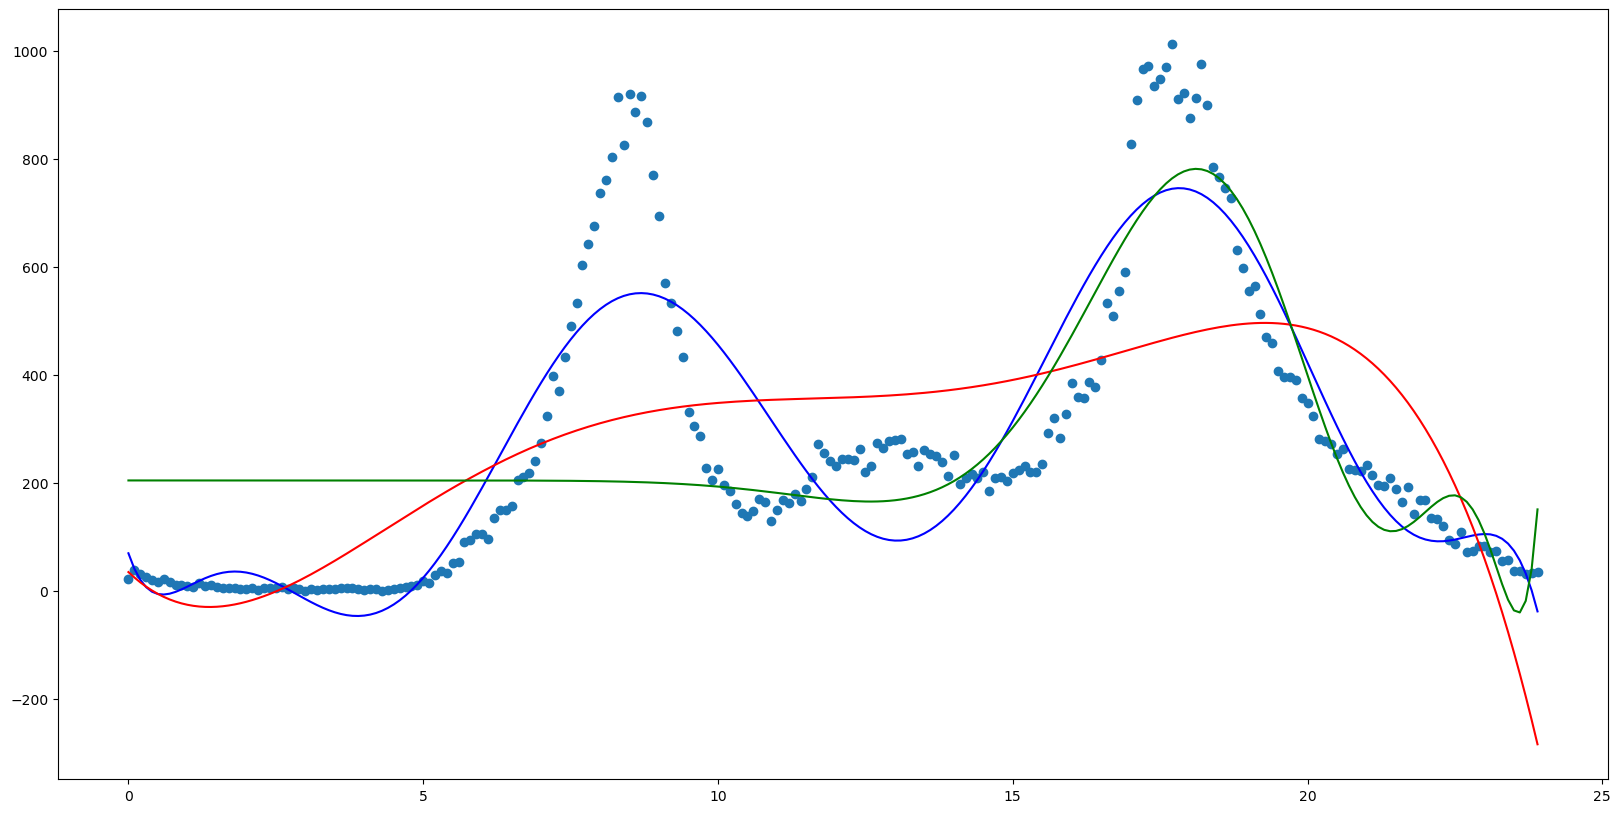

In [12]:
# Plotting all Models 
plt.scatter(x,y)
plt.plot(x, linear10_monday.predict(x_10), c='b')
plt.plot(x, linear5_monday.predict(x_5), c='r')
plt.plot(x, linear20_monday.predict(x_20), c='g')

## 2b. Repeat `2a` for `saturday`

In [13]:
# Updating x & y for 'saturday and repeating the code below:
x = saturday['hour']
y = saturday['saturday']

x = np.asarray(x)
y = np.asarray(y)

x = x.reshape(-1,1)
y = y.reshape(-1,1)

x = np.nan_to_num(x, nan=0.0) # A NaN is throwing off my models 
y = np.nan_to_num(y, nan=0.0)

In [14]:
# x ^ 10 Polynomial
linear.fit(x,y)

poly = PolynomialFeatures(degree=10)
x_10 = poly.fit_transform(x)

linear10_saturday = linear_model.LinearRegression()
linear10_saturday.fit(x_10, y)
(linear10_saturday.coef_, linear.intercept_)

# x ^ 5 Polynomial
poly = PolynomialFeatures(degree=5)
x_5 = poly.fit_transform(x)

linear5_saturday = linear_model.LinearRegression()
linear5_saturday.fit(x_5, y)
(linear5_saturday.coef_, linear.intercept_)

# x ^ 20 Polynomial
poly = PolynomialFeatures(degree=20)
x_20 = poly.fit_transform(x)

linear20_saturday = linear_model.LinearRegression()
linear20_saturday.fit(x_20, y)
(linear20_saturday.coef_, linear.intercept_)

(array([[ 0.00000000e+00,  1.20021160e-13,  1.23109982e-16,
          1.36071800e-19,  5.10422186e-20,  5.62339868e-19,
          6.14566182e-18,  6.42656370e-17,  6.37230476e-16,
          5.90677072e-15,  5.01027639e-14,  3.76172473e-13,
          2.36322461e-12,  1.11253844e-11,  2.91819588e-11,
         -9.00283130e-12,  1.10626576e-12, -7.16113912e-14,
          2.59158221e-15, -4.98140970e-17,  3.97645605e-19]]),
 array([91.97282158]))

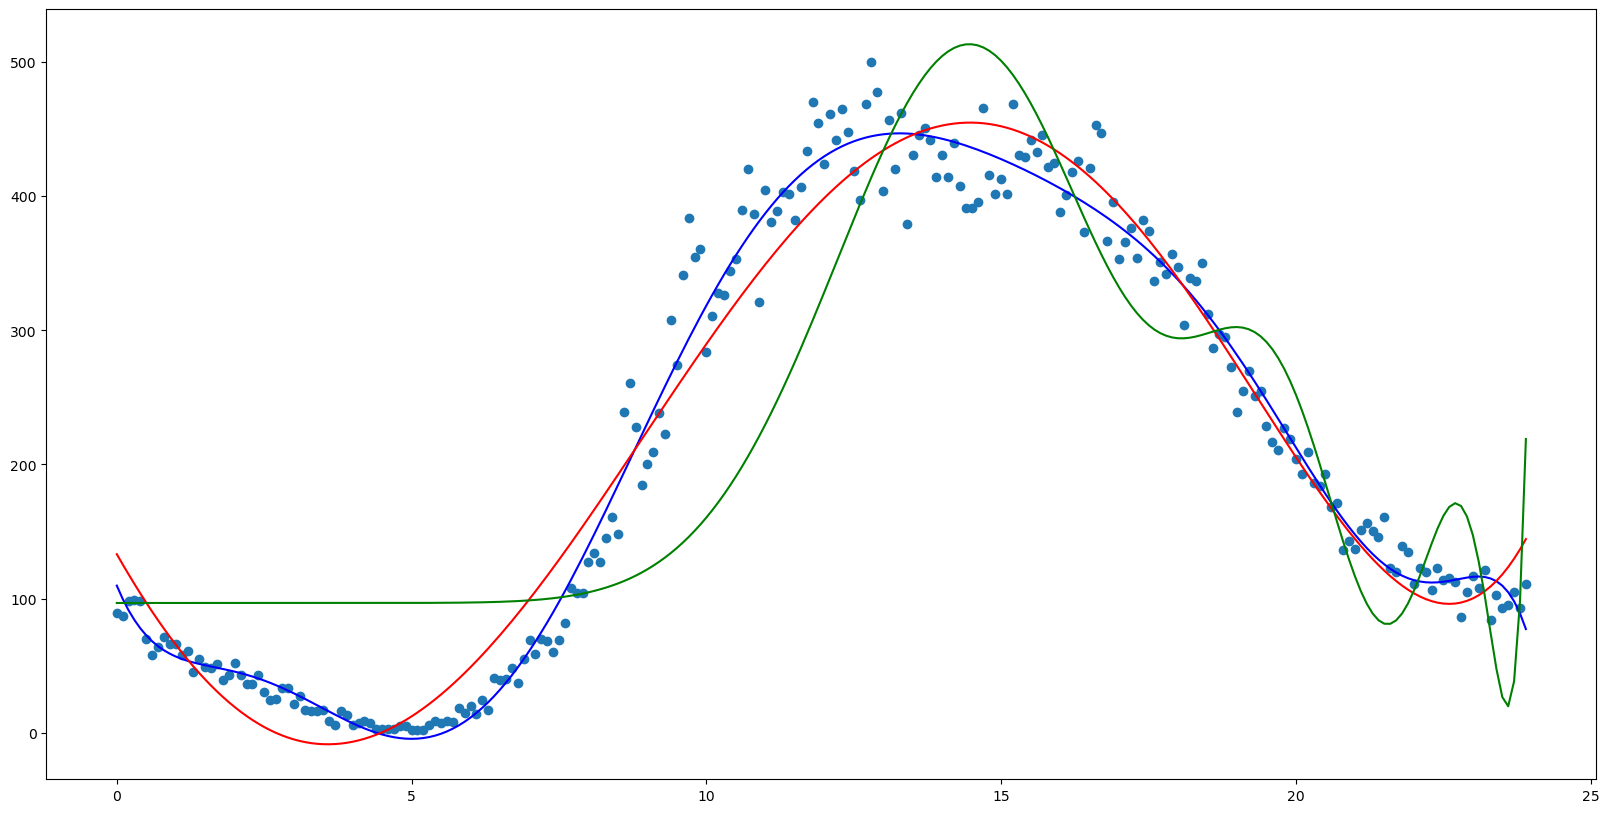

In [15]:
plt.scatter(x,y)
plt.plot(x, linear10_saturday.predict(x_10), c='b')
plt.plot(x, linear5_saturday.predict(x_5), c='r')
plt.plot(x, linear20_saturday.predict(x_20), c='g')

## 3. Using the best `monday` model's prediction, determine the errors (MSE, MAE, MAPE) between the prediction with the `monday` and `tuesday` datasets

## Repeat for `saturday`/`sunday`


In [19]:
#Monday/Tuesday
# Monday 'y' Value
y = monday['monday']
y = np.asarray(y)
y = y.reshape(-1,1)
y = np.nan_to_num(y, nan=0.0)

# MSE
(
    metrics.mean_squared_error(y, linear5_monday.predict(x_5)),
    metrics.mean_squared_error(y, linear10_monday.predict(x_10)), # x^10 Polynomial seemed best but checking errors to verify
    metrics.mean_squared_error(y, linear20_monday.predict(x_20))
)

(41691.623119537966, 15797.94571296849, 38411.98741133111)

In [20]:
# MAE
(
    metrics.mean_absolute_error(y, linear5_monday.predict(x_5)),
    metrics.mean_absolute_error(y, linear10_monday.predict(x_10)),
    metrics.mean_absolute_error(y, linear20_monday.predict(x_20))
)

(155.29586060280042, 95.4944071238648, 142.087052361142)

In [21]:
# MAPE
(
    metrics.mean_absolute_percentage_error(y, linear5_monday.predict(x_5)),
    metrics.mean_absolute_percentage_error(y, linear10_monday.predict(x_10)),
    metrics.mean_absolute_percentage_error(y, linear20_monday.predict(x_20))
)

(2510747970908683.0, 996387484147850.5, 7656272697739356.0)

In [22]:
# Tuesday Results 
# Tuesday 'y' Value
y = tuesday['tuesday']
y = np.asarray(y)
y = y.reshape(-1,1)
y = np.nan_to_num(y, nan=0.0)

In [23]:
# MSE
(
    metrics.mean_squared_error(y, linear5_monday.predict(x_5)),
    metrics.mean_squared_error(y, linear10_monday.predict(x_10)),
    metrics.mean_squared_error(y, linear20_monday.predict(x_20))
)

(50934.14686789293, 19458.83509202751, 45184.0093751261)

In [24]:
# MAE
(
    metrics.mean_absolute_error(y, linear5_monday.predict(x_5)),
    metrics.mean_absolute_error(y, linear10_monday.predict(x_10)),
    metrics.mean_absolute_error(y, linear20_monday.predict(x_20))
)

(160.60672891960334, 98.7838993534306, 148.6535765141456)

In [25]:
# MAPE
(
    metrics.mean_absolute_percentage_error(y, linear5_monday.predict(x_5)),
    metrics.mean_absolute_percentage_error(y, linear10_monday.predict(x_10)),
    metrics.mean_absolute_percentage_error(y, linear20_monday.predict(x_20))
)

(1031934695490725.6, 685577805657012.9, 7656290675479110.0)

In [26]:
#Saturday/Sunday
y = saturday['saturday']
y = np.asarray(y)
y = y.reshape(-1,1)
y = np.nan_to_num(y, nan=0.0)

# MSE
(
    metrics.mean_squared_error(y, linear5_saturday.predict(x_5)),
    metrics.mean_squared_error(y, linear10_saturday.predict(x_10)),
    metrics.mean_squared_error(y, linear20_saturday.predict(x_20))
)

(995.2167048171076, 475.432117731917, 6297.797133151873)

In [27]:
# MAE
(
    metrics.mean_absolute_error(y, linear5_saturday.predict(x_5)),
    metrics.mean_absolute_error(y, linear10_saturday.predict(x_10)),
    metrics.mean_absolute_error(y, linear20_saturday.predict(x_20))
)

(25.347169800274006, 15.803728740895234, 65.02420578957252)

In [28]:
# MAPE
(
    metrics.mean_absolute_percentage_error(y, linear5_saturday.predict(x_5)),
    metrics.mean_absolute_percentage_error(y, linear10_saturday.predict(x_10)),
    metrics.mean_absolute_percentage_error(y, linear20_saturday.predict(x_20))
)

(0.4698986726321545, 0.22012829723849595, 2.4338117469461764)

In [58]:
# Sunday Results 
# Sunday 'y' Value
y = sunday['sunday']
y = np.asarray(y)
y = y.reshape(-1,1)
y = np.nan_to_num(y, nan=0.0)

# MSE
(
    metrics.mean_squared_error(y, linear5_saturday.predict(x_5)),
    metrics.mean_squared_error(y, linear10_saturday.predict(x_10)),
    metrics.mean_squared_error(y, linear20_saturday.predict(x_20))
)

(1751.9785641232713, 1366.0930279055237, 4813.94395043641)

In [59]:
# MAE
(
    metrics.mean_absolute_error(y, linear5_saturday.predict(x_5)),
    metrics.mean_absolute_error(y, linear10_saturday.predict(x_10)),
    metrics.mean_absolute_error(y, linear20_saturday.predict(x_20))
)

(33.09179943580984, 28.09846879707431, 59.146660667885165)

In [60]:
# MAPE
(
    metrics.mean_absolute_percentage_error(y, linear5_saturday.predict(x_5)),
    metrics.mean_absolute_percentage_error(y, linear10_saturday.predict(x_10)),
    metrics.mean_absolute_percentage_error(y, linear20_saturday.predict(x_20))
)

(0.7723154684354743, 0.4082860111367491, 2.283873728034668)

## 4. With `saturday`, use `train_test_split` to create training and test sets and build a model. Create predictions using the xtest from and determine the errors between these predictions and the ytest (MSE, MAE, MAPE).

## repeat for `monday`

In [64]:
from sklearn.model_selection import train_test_split

#Saturday
# Updating x & y for 'saturday and repeating the code below:
x = saturday['hour']
y = saturday['saturday']

x = np.asarray(x)
y = np.asarray(y)

x = x.reshape(-1,1)
y = y.reshape(-1,1)

x = np.nan_to_num(x, nan=0.0) # A NaN is throwing off my models 
y = np.nan_to_num(y, nan=0.0)

n = 100
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

# linear = linear_model.LinearRegression().fit(xtrain, ytrain)

xtrain10_saturday = PolynomialFeatures(degree=10).fit_transform(xtrain)
xtest10_saturday = PolynomialFeatures(degree=10).fit_transform(xtest)
linear10_saturday = linear_model.LinearRegression().fit(xtrain10_saturday, ytrain)

xtrain15_saturday = PolynomialFeatures(degree=15).fit_transform(xtrain)
xtest15_saturday = PolynomialFeatures(degree=15).fit_transform(xtest)
linear15_saturday = linear_model.LinearRegression().fit(xtrain15_saturday, ytrain)

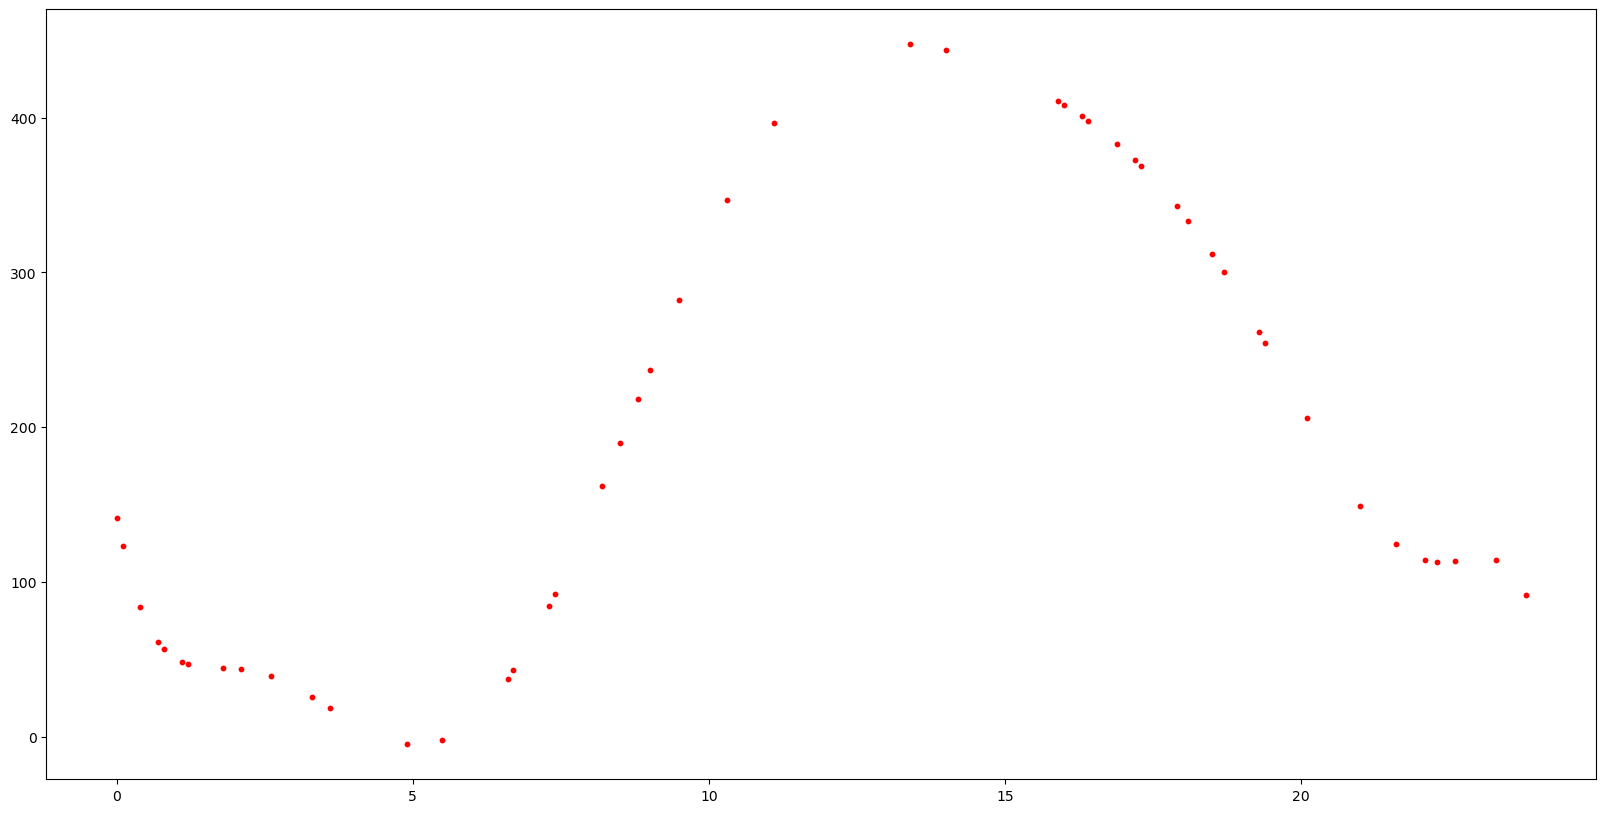

In [65]:
size = 10
plt.scatter(xtest, linear10_saturday.predict(xtest10_saturday), c='r', s=size)

In [66]:
(
    metrics.mean_squared_error(ytest, linear15_saturday.predict(xtest15)),
    metrics.mean_absolute_error(ytest, linear15_saturday.predict(xtest15)),
    metrics.mean_absolute_percentage_error(ytest, linear15_saturday.predict(xtest15))
)

(50435.26774874914, 190.32527819285647, 2.7194204212694704)

In [67]:
from sklearn.model_selection import train_test_split

# Monday
# Updating x & y for 'saturday and repeating the code below:
x = monday['hour']
y = monday['monday']

x = np.asarray(x)
y = np.asarray(y)

x = x.reshape(-1,1)
y = y.reshape(-1,1)

x = np.nan_to_num(x, nan=0.0) # A NaN is throwing off my models 
y = np.nan_to_num(y, nan=0.0)

n = 100
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

# linear = linear_model.LinearRegression().fit(xtrain, ytrain)

# xtrain10 = PolynomialFeatures(degree=10).fit_transform(xtrain)
# xtest10 = PolynomialFeatures(degree=10).fit_transform(xtest)
# linear10 = linear_model.LinearRegression().fit(xtrain10, ytrain)

xtrain15_monday = PolynomialFeatures(degree=15).fit_transform(xtrain)
xtest15_monday = PolynomialFeatures(degree=15).fit_transform(xtest)
linear15_monday = linear_model.LinearRegression().fit(xtrain15, ytrain)

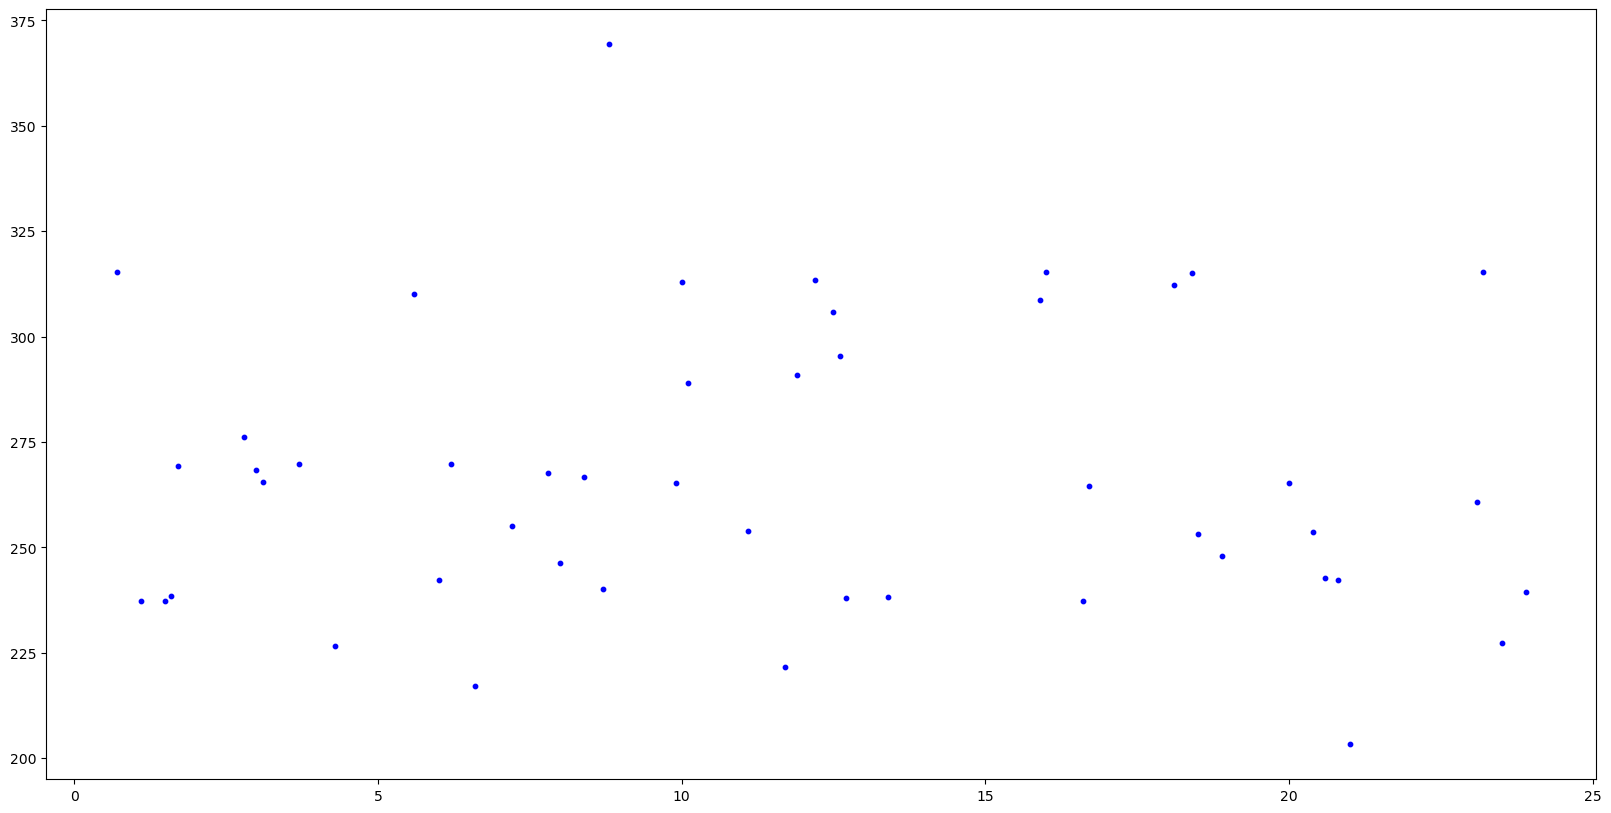

In [68]:
size = 10
plt.scatter(xtest, linear15_monday.predict(xtest15), c='b', s=size)

In [69]:
(
    metrics.mean_squared_error(ytest, linear15_monday.predict(xtest15)),
    metrics.mean_absolute_error(ytest, linear15_monday.predict(xtest15)),
    metrics.mean_absolute_percentage_error(ytest, linear15_monday.predict(xtest15))
)

(73536.50396284113, 210.07066890545207, 4.6446889255946024e+16)